# Evolución del Lenguaje: Palabras más dichas a lo largo del tiempo


Obviamente, las palabras más utilizadas que no estén contenidas dentro de las "stop-words" ya que estas aportan poca info relevante en este aspecto.

## Librerías a utilizar:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

## Datos:

In [2]:
df_scripts = pd.read_csv('The Saimpsons Archive/in_use/simpsons_script_lines.csv')
print(df_scripts.shape)
df_scripts.sample(3)

(158270, 13)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
90843,100868,351,38,Homer Simpson: So why didn't you invite me?,210000,True,2.0,270.0,Homer Simpson,Springfield Street,So why didn't you invite me?,so why didnt you invite me,6.0
144325,154838,555,271,Caveman Homer: D'oh!,1209000,True,6167.0,4375.0,Caveman Homer,GRASSLANDS,D'oh!,doh,1.0
62259,72228,251,297,(SOPHIE'S BUILDING: EXT. SOPHIE'S BUILDING - M...,1254000,False,NaN,2141.0,NaN,SOPHIE'S BUILDING,NaN,NaN,0.0


In [3]:
df_ep = pd.read_csv('The Saimpsons Archive/in_use/simpsons_episodes.csv')
df_ep.sample(3)

,id,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,views
128,342,7.0,523.0,7,342,2005-01-30,2005,GABF01,16,Mommie Beerest,9.97,46256.0
452,461,7.2,519.0,20,461,2010-05-02,2010,MABF12,21,To Surveil with Love,6.06,45738.0
315,159,8.0,1008.0,6,159,1996-12-01,1996,4F04,8,A Milhouse Divided,12.80,60956.0


In [4]:
df_scripts = pd.merge(df_scripts, df_ep[['id', 'season']], left_on='episode_id', right_on='id')
df_scripts

,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,season
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,32,2
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,32,2
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,32,2
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0,32,2
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158265,9335,31,269,"Dr. Julius Hibbert: Provocative, but powerful.",1278000,True,332.0,370.0,Dr. Julius Hibbert,SPRINGFIELD ART MUSEUM,"Provocative, but powerful.",provocative but powerful,3.0,31,2
158266,9336,31,270,"MRS. HOOVER: He's bad, but he'll die. So I lik...",1280000,True,462.0,370.0,MRS. HOOVER,SPRINGFIELD ART MUSEUM,"He's bad, but he'll die. So I like it.",hes bad but hell die so i like it,9.0,31,2
158267,9337,31,271,C. Montgomery Burns: (CALLING) Marge... a word...,1285000,True,15.0,370.0,C. Montgomery Burns,SPRINGFIELD ART MUSEUM,"Marge... a word, please.",marge a word please,4.0,31,2
158268,9338,31,272,"C. Montgomery Burns: You know, I'm no art crit...",1287000,True,15.0,370.0,C. Montgomery Burns,SPRINGFIELD ART MUSEUM,"You know, I'm no art critic, but I know what I...",you know im no art critic but i know what i ha...,34.0,31,2


### Mini-tratamiento datos básico

In [5]:
season_group_1 = range(1,11)
season_group_2 = range(11, 20)
season_group_3 = range(20, 29)

In [6]:
df_scripts.loc[df_scripts['season'].isin(season_group_1), 'season_group'] = 1
df_scripts.loc[df_scripts['season'].isin(season_group_2), 'season_group'] = 2
df_scripts.loc[df_scripts['season'].isin(season_group_3), 'season_group'] = 3
df_scripts.sample(5)

,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,season,season_group
5994,11764,39,216,(Simpson Home: INT. simpson house - BART'S BED...,951000,False,NaN,5.0,NaN,Simpson Home,NaN,NaN,0.0,39,3,1.0
154354,2303,8,184,Bart Simpson: That one looks like the statue o...,736000,True,8.0,50.0,Bart Simpson,Park,That one looks like the statue of our town fou...,that one looks like the statue of our town fou...,12.0,8,1,1.0
69720,75375,262,4,(TRACK STADIUM: ext. track stadium - mexico ci...,114000,False,NaN,2205.0,NaN,TRACK STADIUM,NaN,NaN,0.0,262,12,2.0
88183,96708,335,274,"Patty Bouvier: ""Are you a 'Patty' or a 'Selma?...",1223000,True,10.0,53.0,Patty Bouvier,Burns Manor,"""Are you a 'Patty' or a 'Selma?' Take our quiz...",blow me down,NaN,335,15,2.0
102558,111362,390,141,Darcy: (GIGGLE),767000,False,2000.0,3225.0,Darcy,North Haverbrook Main Drag,NaN,NaN,0.0,390,18,2.0


## NLP:

### Tokenización

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/enriquealcocebaalvarez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df_scripts = df_scripts[df_scripts['speaking_line']==True]
df_scripts['tokenized_spoken_words'] = df_scripts['spoken_words'].apply(nltk.word_tokenize)
def filter_alpha(tokens):
    return [x for x in tokens if x.isalpha()]

def token_lower(tokens):
    return [x.lower() for x in tokens if x.lower() == x ]

df_scripts['tokenized_spoken_words'] = df_scripts['tokenized_spoken_words'].apply(filter_alpha)
df_scripts['tokenized_spoken_words'] = df_scripts['tokenized_spoken_words'].apply(token_lower)
df_scripts.sample()

/var/folders/wr/llsqfgn14y9g_c3l32fq8qxw0000gn/T/ipykernel_38920/1956064410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scripts['tokenized_spoken_words'] = df_scripts['spoken_words'].apply(nltk.word_tokenize)
/var/folders/wr/llsqfgn14y9g_c3l32fq8qxw0000gn/T/ipykernel_38920/1956064410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scripts['tokenized_spoken_words'] = df_scripts['tokenized_spoken_words'].apply(filter_alpha)
/var/folders/wr/llsqfgn14y9g_c3l32fq8qxw0000gn/T/ipykernel_38920/195

,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,season,season_group,tokenized_spoken_words
62668,68323,238,270,"Lisa Simpson: Ah, it's good to be home.",1268000,True,9.0,5.0,Lisa Simpson,Simpson Home,"Ah, it's good to be home.",ah its good to be home,6.0,238,11,2.0,"[it, good, to, be, home]"


### Stop_words

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/enriquealcocebaalvarez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words_eng = stopwords.words('english')
stop_words_eng[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
def remove_stopwords(tokens):
    return [x for x in tokens if x not in stop_words_eng]

df_scripts['tokens_no_stopwords'] = df_scripts['tokenized_spoken_words'].apply(remove_stopwords)
df_scripts.sample(3)

/var/folders/wr/llsqfgn14y9g_c3l32fq8qxw0000gn/T/ipykernel_38920/3603453781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scripts['tokens_no_stopwords'] = df_scripts['tokenized_spoken_words'].apply(remove_stopwords)


,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,season,season_group,tokenized_spoken_words,tokens_no_stopwords
29578,35759,124,139,Teacher: (TO KRABAPPEL) Skinner said the teach...,643000,True,21.0,133.0,Teacher,House,Skinner said the teachers will crack any minut...,skinner said the teachers will crack any minut...,11.0,124,6,1.0,"[said, the, teachers, will, crack, any, minute...","[said, teachers, crack, minute, purple, monkey..."
81574,89326,309,211,"Lisa Simpson: Yeah, it sure is...",899000,True,9.0,2582.0,Lisa Simpson,DIRT ROAD THROUGH FOREST,"Yeah, it sure is...",yeah it sure is,4.0,309,14,2.0,"[it, sure, is]",[sure]
46219,51870,184,142,"Teenage Lenny: (RE: HOMER) Wow, he's dy-no-mite!",649000,True,2349.0,5.0,Teenage Lenny,Simpson Home,"Wow, he's dy-no-mite!",wow hes dy-no-mite,3.0,184,9,1.0,[he],[]


### Lematización

In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/enriquealcocebaalvarez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df_scripts['lemmatized_text'] = df_scripts['tokens_no_stopwords'].apply(lemmatize_tokens)

df_scripts.sample(3)

/var/folders/wr/llsqfgn14y9g_c3l32fq8qxw0000gn/T/ipykernel_38920/814977486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scripts['lemmatized_text'] = df_scripts['tokens_no_stopwords'].apply(lemmatize_tokens)


,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,season,season_group,tokenized_spoken_words,tokens_no_stopwords,lemmatized_text
151190,369,1,368,Lisa Simpson: (SINGING) THEY NEVER LET POOR RU...,1347000,True,9.0,5.0,Lisa Simpson,Simpson Home,THEY NEVER LET POOR RUDOLPH / JOIN IN ANY REIN...,they never let poor rudolph join in any reinde...,10.0,1,1,1.0,[],[],[]
47780,53509,190,238,"Cooder: Yeah, good thinkin', Spudford. Ah, you...",954000,True,2396.0,5.0,Cooder,Simpson Home,"Yeah, good thinkin', Spudford. Ah, you folks e...",yeah good thinkin spudford ah you folks ever b...,23.0,190,9,1.0,"[good, thinkin, you, folks, ever, been, on, a,...","[good, thinkin, folks, ever, glass, bottom, bo...","[good, thinkin, folk, ever, glass, bottom, boa..."
74364,81293,281,128,BUCK: I like the sound of that last one.,590000,True,3498.0,5.0,BUCK,Simpson Home,I like the sound of that last one.,i like the sound of that last one,8.0,281,13,2.0,"[like, the, sound, of, that, last, one]","[like, sound, last, one]","[like, sound, last, one]"


## Visualización TOPs palabras

### Top 15 para todos los personajes

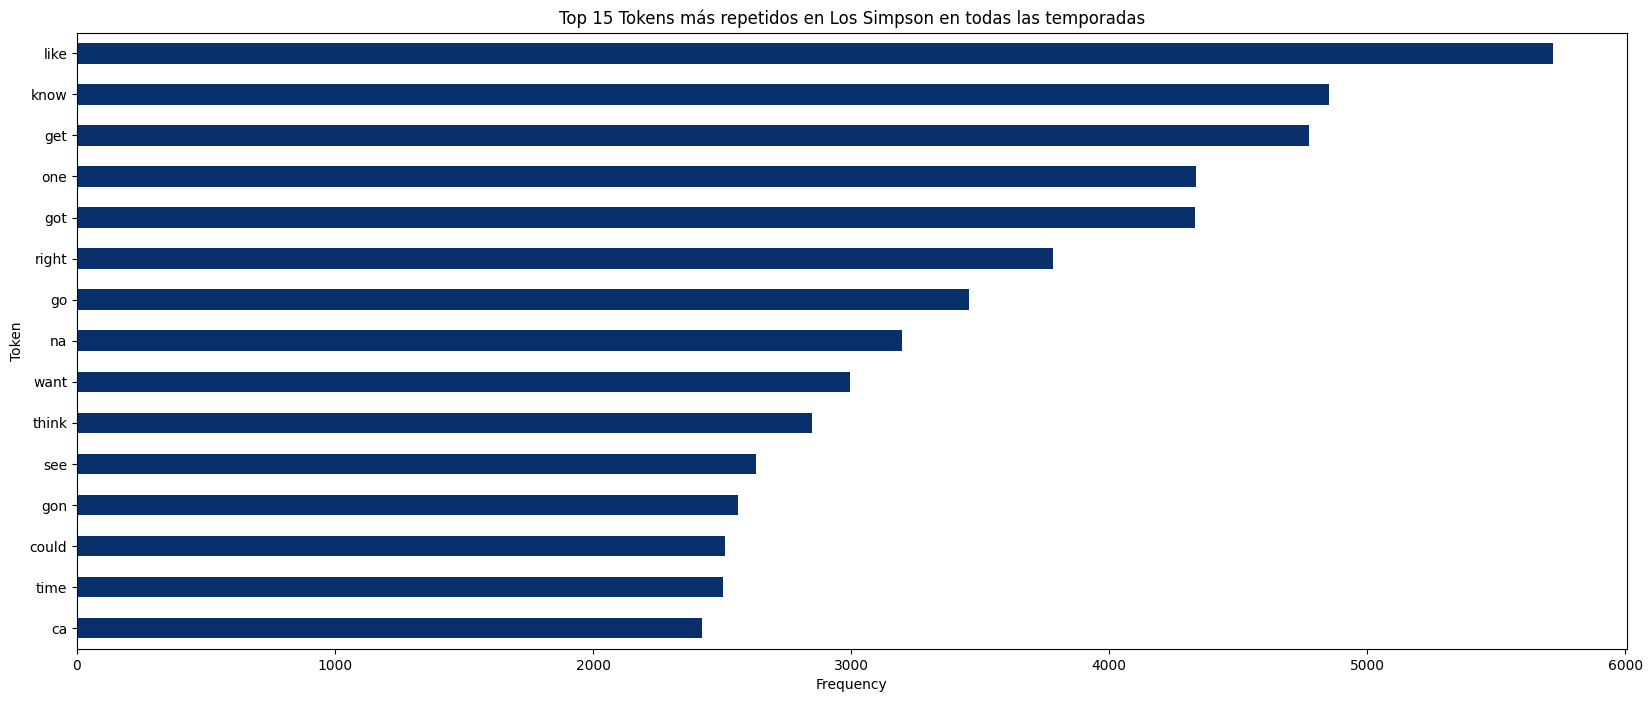

In [14]:
combined_text_all = ' '.join(df_scripts['lemmatized_text'].apply(' '.join))

word_freq_all = pd.Series(combined_text_all.split()).value_counts().head(15)
word_freq_all_sorted = word_freq_all.sort_values(ascending=True)

plt.figure(figsize=(20, 8))
word_freq_all_sorted.plot(kind='barh', colormap='Blues_r')
plt.title('Top 15 Tokens más repetidos en Los Simpson en todas las temporadas')
plt.xlabel('Frequency')
plt.ylabel('Token')

plt.show()

In [15]:
df_scripts_sg1 = df_scripts[df_scripts['season_group']==1]
df_scripts_sg2 = df_scripts[df_scripts['season_group']==2]
df_scripts_sg3 = df_scripts[df_scripts['season_group']==3]

# Grupo temporadas 1
combined_text_sg1 = ' '.join(df_scripts_sg1['lemmatized_text'].apply(' '.join))
word_freq_sg1 = pd.Series(combined_text_sg1.split()).value_counts().head(15)
word_freq_sg1_sorted = word_freq_sg1.sort_values(ascending=True)

# Grupo temporadas 2
combined_text_sg2 = ' '.join(df_scripts_sg2['lemmatized_text'].apply(' '.join))
word_freq_sg2 = pd.Series(combined_text_sg2.split()).value_counts().head(15)
word_freq_sg2_sorted = word_freq_sg2.sort_values(ascending=True)

# Grupo temporadas 3
combined_text_sg3 = ' '.join(df_scripts_sg3['lemmatized_text'].apply(' '.join))
word_freq_sg3 = pd.Series(combined_text_sg3.split()).value_counts().head(15)
word_freq_sg3_sorted = word_freq_sg3.sort_values(ascending=True)


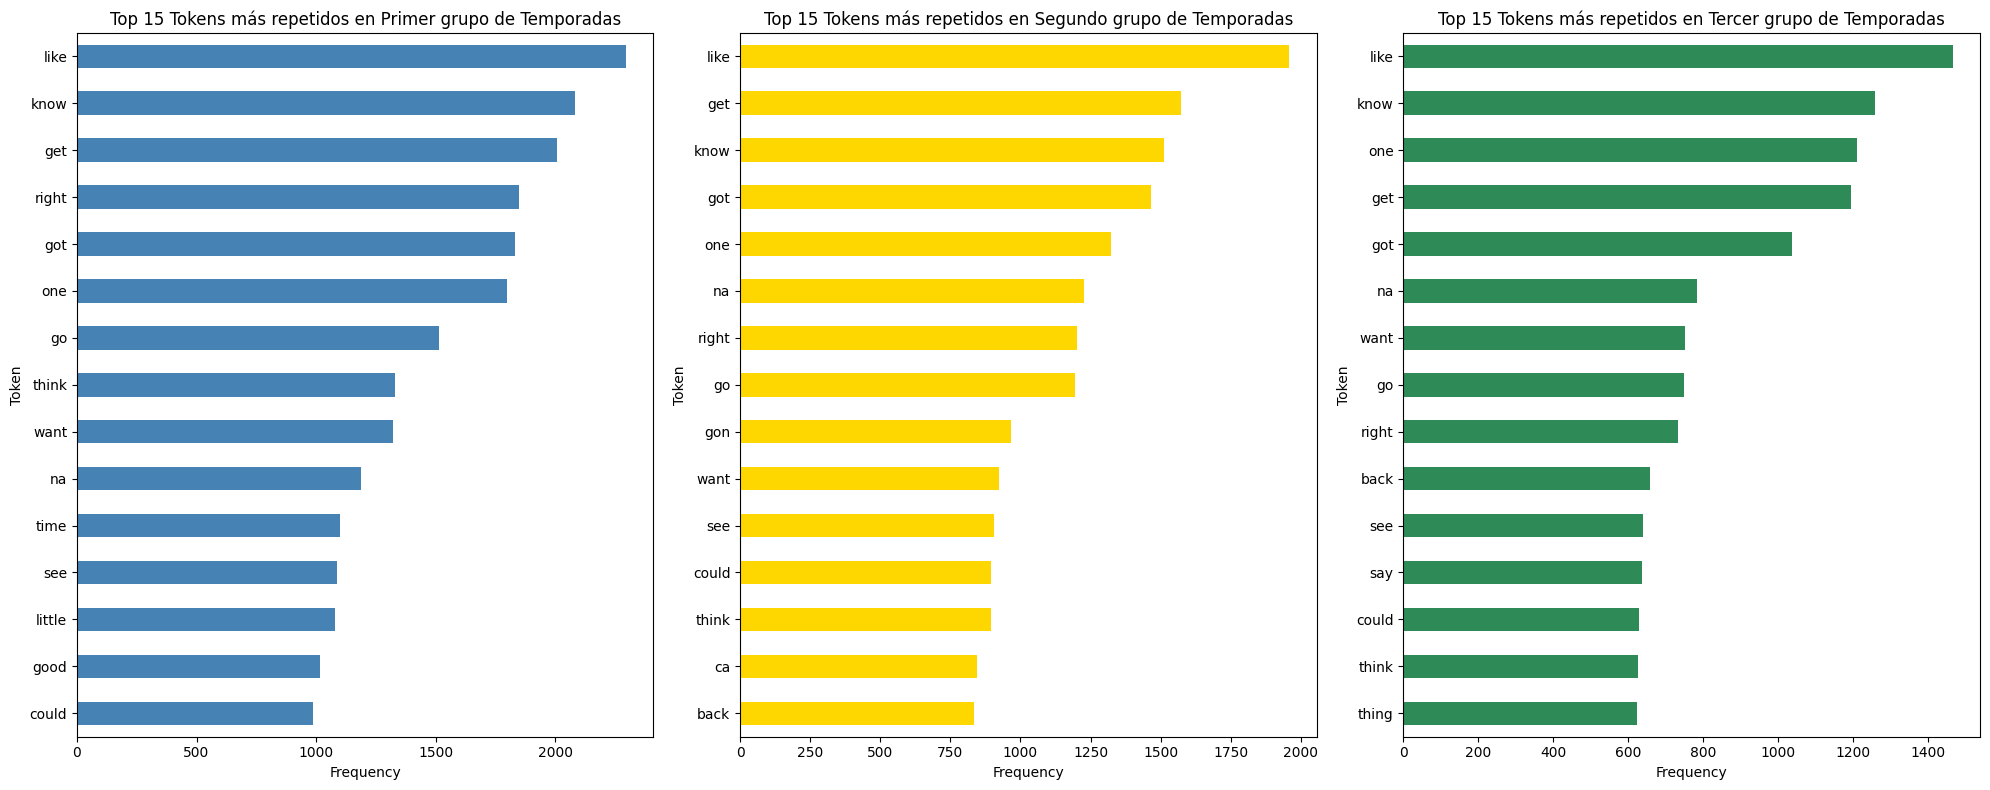

In [16]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
word_freq_sg1_sorted.plot(kind='barh', color='#4682B4')
plt.title('Top 15 Tokens más repetidos en Primer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Token')

plt.subplot(1, 3, 2)
word_freq_sg2_sorted.plot(kind='barh', color='#FFD700')
plt.title('Top 15 Tokens más repetidos en Segundo grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Token')

plt.subplot(1, 3, 3)
word_freq_sg3_sorted.plot(kind='barh', color='#2E8B57')
plt.title('Top 15 Tokens más repetidos en Tercer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Token')

plt.tight_layout()
plt.show()

### Top 10 para Homer Simpson

In [18]:
df_scripts_sg1_hs = df_scripts[(df_scripts['season_group'] == 1) & (df_scripts['character_id'] == 2.0)]
df_scripts_sg2_hs = df_scripts[(df_scripts['season_group'] == 2) & (df_scripts['character_id'] == 2.0)]
df_scripts_sg3_hs = df_scripts[(df_scripts['season_group'] == 3) & (df_scripts['character_id'] == 2.0)]

# Grupo temporadas 1
combined_text_sg1_hs = ' '.join(df_scripts_sg1_hs['lemmatized_text'].apply(' '.join))
word_freq_sg1_hs = pd.Series(combined_text_sg1_hs.split()).value_counts().head(15)
word_freq_sg1_sorted_hs = word_freq_sg1_hs.sort_values(ascending=True)

# Grupo temporadas 2
combined_text_sg2_hs = ' '.join(df_scripts_sg2_hs['lemmatized_text'].apply(' '.join))
word_freq_sg2_hs = pd.Series(combined_text_sg2_hs.split()).value_counts().head(15)
word_freq_sg2_sorted_hs = word_freq_sg2_hs.sort_values(ascending=True)

# Grupo temporadas 3
combined_text_sg3_hs = ' '.join(df_scripts_sg3_hs['lemmatized_text'].apply(' '.join))
word_freq_sg3_hs = pd.Series(combined_text_sg3_hs.split()).value_counts().head(15)
word_freq_sg3_sorted_hs = word_freq_sg3_hs.sort_values(ascending=True)

(-0.5, 799.5, 399.5, -0.5)

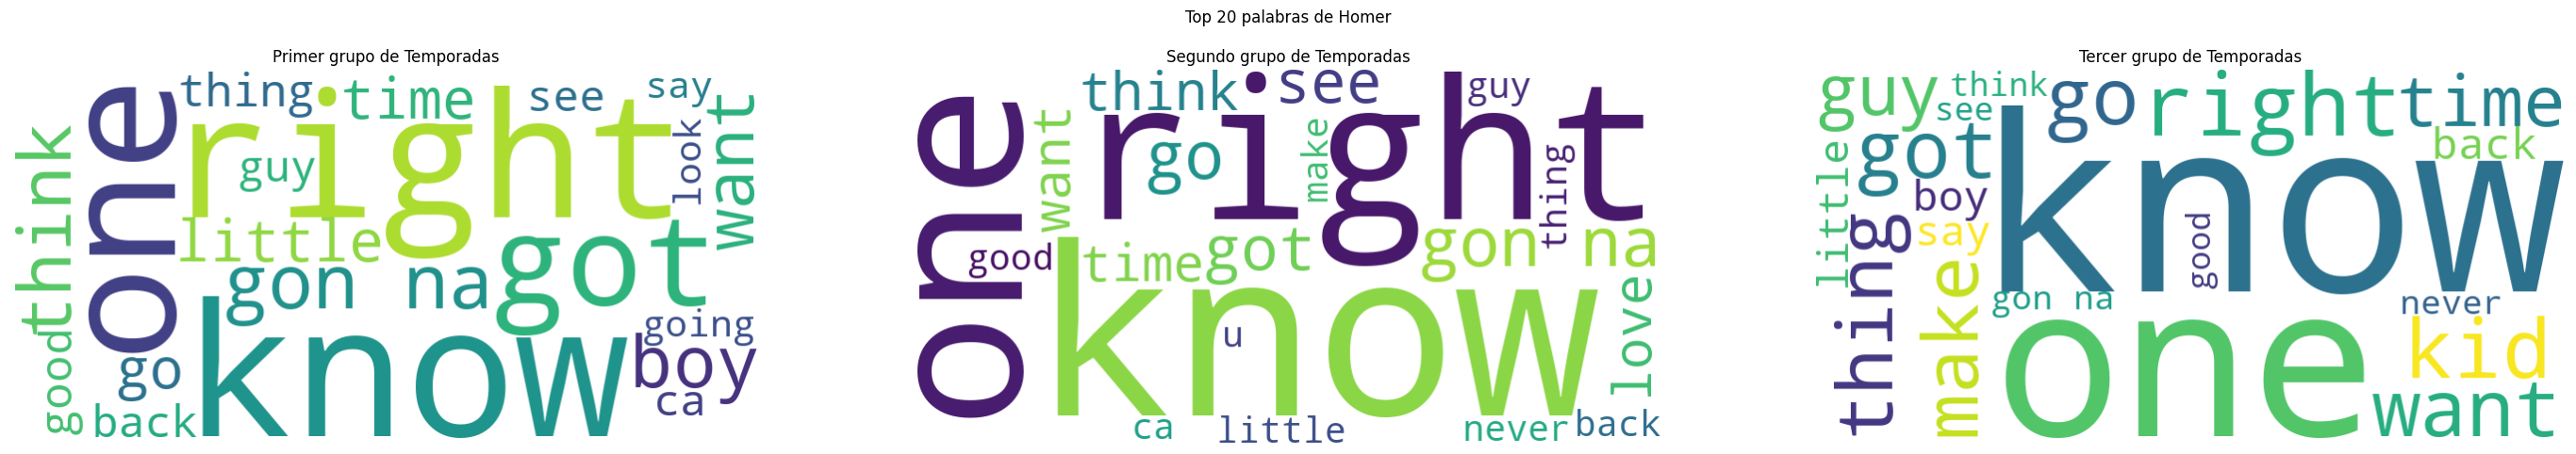

In [29]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(width=800, height=400, background_color='white', max_words=20).generate(combined_text_sg1_hs)
wordcloud2 = WordCloud(width=800, height=400, background_color='white', max_words=20).generate(combined_text_sg2_hs)
wordcloud3 = WordCloud(width=800, height=400, background_color='white', max_words=20).generate(combined_text_sg3_hs)

plt.figure(figsize=(35, 8))
#plt.title('Top 20 palabras de Homer')
#plt.axis('off')


plt.subplot(1, 3, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Primer grupo de Temporadas')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Top 20 palabras de Homer\n\nSegundo grupo de Temporadas')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('Tercer grupo de Temporadas')
plt.axis('off')


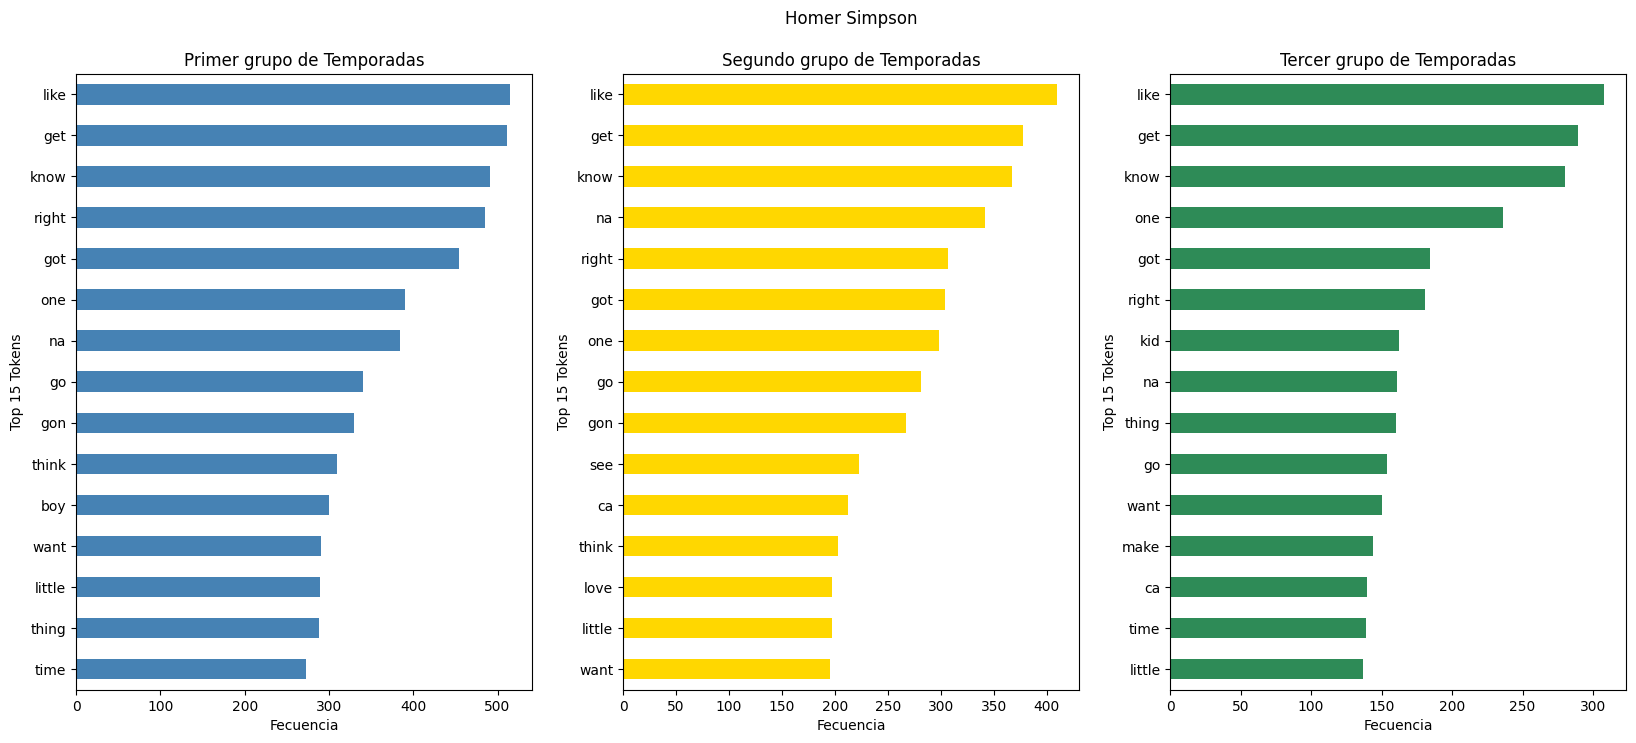

In [27]:
plt.figure(figsize=(20, 8))

plt.title('Homer Simpson\n\n')
plt.axis('off')

plt.subplot(1, 3, 1)
word_freq_sg1_sorted_hs.plot(kind='barh', color='#4682B4')
plt.title('Primer grupo de Temporadas')
plt.xlabel('Fecuencia')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 2)
word_freq_sg2_sorted_hs.plot(kind='barh', color='#FFD700')
plt.title('Segundo grupo de Temporadas')
plt.xlabel('Fecuencia')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 3)
word_freq_sg3_sorted_hs.plot(kind='barh', color='#2E8B57')
plt.title('Tercer grupo de Temporadas')
plt.xlabel('Fecuencia')
plt.ylabel('Top 15 Tokens')

plt.show()

### Para Marge Simpson

In [21]:
df_scripts_sg1_ms = df_scripts[(df_scripts['season_group'] == 1) & (df_scripts['character_id'] == 1.0)]
df_scripts_sg2_ms = df_scripts[(df_scripts['season_group'] == 2) & (df_scripts['character_id'] == 1.0)]
df_scripts_sg3_ms = df_scripts[(df_scripts['season_group'] == 3) & (df_scripts['character_id'] == 1.0)]

# Grupo temporadas 1
combined_text_sg1_ms = ' '.join(df_scripts_sg1_ms['lemmatized_text'].apply(' '.join))
word_freq_sg1_ms = pd.Series(combined_text_sg1_ms.split()).value_counts().head(15)
word_freq_sg1_sorted_ms = word_freq_sg1_ms.sort_values(ascending=True)

# Grupo temporadas 2
combined_text_sg2_ms = ' '.join(df_scripts_sg2_ms['lemmatized_text'].apply(' '.join))
word_freq_sg2_ms = pd.Series(combined_text_sg2_ms.split()).value_counts().head(15)
word_freq_sg2_sorted_ms = word_freq_sg2_ms.sort_values(ascending=True)

# Grupo temporadas 3
combined_text_sg3_ms = ' '.join(df_scripts_sg3_ms['lemmatized_text'].apply(' '.join))
word_freq_sg3_ms = pd.Series(combined_text_sg3_ms.split()).value_counts().head(15)
word_freq_sg3_sorted_ms = word_freq_sg3_ms.sort_values(ascending=True)

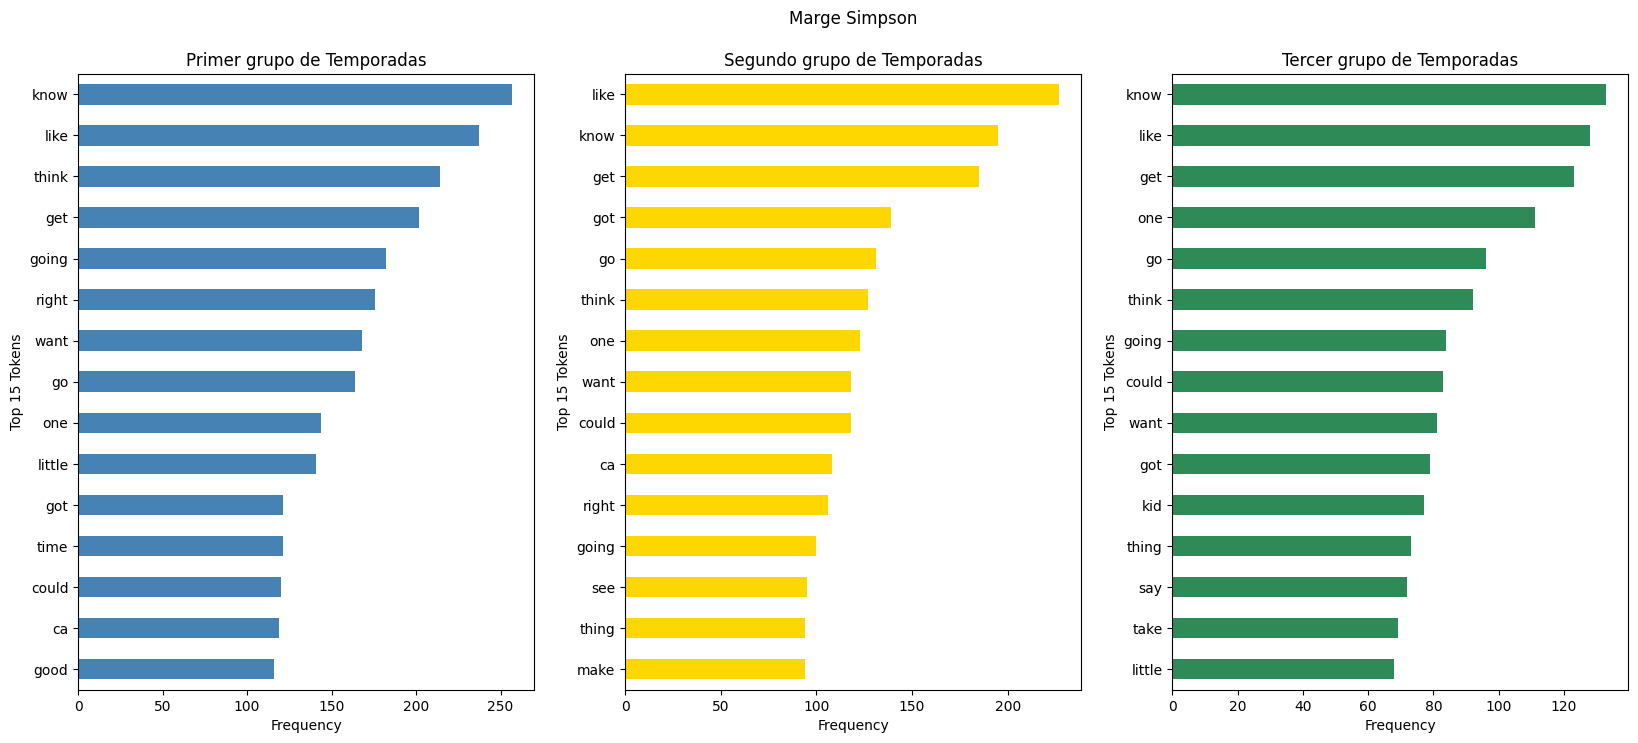

In [30]:
plt.figure(figsize=(20, 8))

plt.title('Marge Simpson\n\n')
plt.axis('off')

plt.subplot(1, 3, 1)
word_freq_sg1_sorted_ms.plot(kind='barh', color='#4682B4')
plt.title('Primer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 2)
word_freq_sg2_sorted_ms.plot(kind='barh', color='#FFD700')
plt.title('Segundo grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 3)
word_freq_sg3_sorted_ms.plot(kind='barh', color='#2E8B57')
plt.title('Tercer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.show()

### Para Bart Simpson

In [23]:
df_scripts_sg1_bs = df_scripts[(df_scripts['season_group'] == 1) & (df_scripts['character_id'] == 8.0)]
df_scripts_sg2_bs = df_scripts[(df_scripts['season_group'] == 2) & (df_scripts['character_id'] == 8.0)]
df_scripts_sg3_bs = df_scripts[(df_scripts['season_group'] == 3) & (df_scripts['character_id'] == 8.0)]

# Grupo temporadas 1
combined_text_sg1_bs = ' '.join(df_scripts_sg1_bs['lemmatized_text'].apply(' '.join))
word_freq_sg1_bs = pd.Series(combined_text_sg1_bs.split()).value_counts().head(15)
word_freq_sg1_sorted_bs = word_freq_sg1_bs.sort_values(ascending=True)

# Grupo temporadas 2
combined_text_sg2_bs = ' '.join(df_scripts_sg2_bs['lemmatized_text'].apply(' '.join))
word_freq_sg2_bs = pd.Series(combined_text_sg2_bs.split()).value_counts().head(15)
word_freq_sg2_sorted_bs = word_freq_sg2_bs.sort_values(ascending=True)

# Grupo temporadas 3
combined_text_sg3_bs = ' '.join(df_scripts_sg3_bs['lemmatized_text'].apply(' '.join))
word_freq_sg3_bs = pd.Series(combined_text_sg3_bs.split()).value_counts().head(15)
word_freq_sg3_sorted_bs = word_freq_sg3_bs.sort_values(ascending=True)

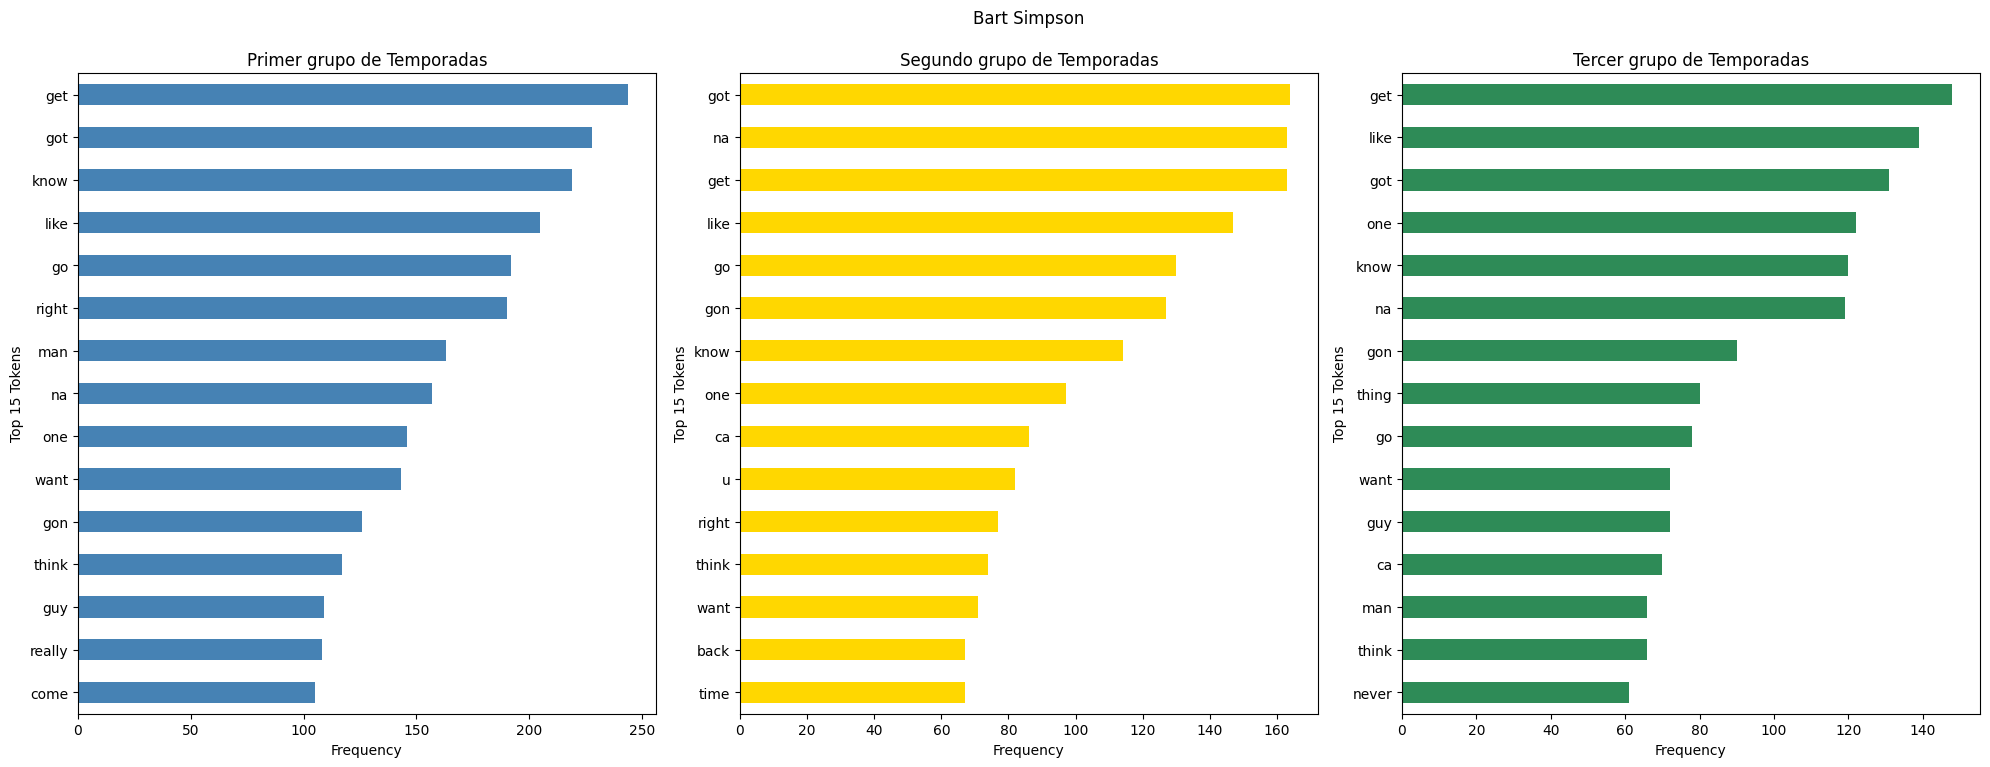

In [31]:
plt.figure(figsize=(20, 8))

plt.title('Bart Simpson\n\n')
plt.axis('off')

plt.subplot(1, 3, 1)
word_freq_sg1_sorted_bs.plot(kind='barh', color='#4682B4')
plt.title('Primer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 2)
word_freq_sg2_sorted_bs.plot(kind='barh', color='#FFD700')
plt.title('Segundo grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 3)
word_freq_sg3_sorted_bs.plot(kind='barh', color='#2E8B57')
plt.title('Tercer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.tight_layout()
plt.show()

### Para Lisa Simpson

In [25]:
df_scripts_sg1_ls = df_scripts[(df_scripts['season_group'] == 1) & (df_scripts['character_id'] == 9.0)]
df_scripts_sg2_ls = df_scripts[(df_scripts['season_group'] == 2) & (df_scripts['character_id'] == 9.0)]
df_scripts_sg3_ls = df_scripts[(df_scripts['season_group'] == 3) & (df_scripts['character_id'] == 9.0)]

# Grupo temporadas 1
combined_text_sg1_ls = ' '.join(df_scripts_sg1_ls['lemmatized_text'].apply(' '.join))
word_freq_sg1_ls = pd.Series(combined_text_sg1_ls.split()).value_counts().head(15)
word_freq_sg1_sorted_ls = word_freq_sg1_ls.sort_values(ascending=True)

# Grupo temporadas 2
combined_text_sg2_ls = ' '.join(df_scripts_sg2_ls['lemmatized_text'].apply(' '.join))
word_freq_sg2_ls = pd.Series(combined_text_sg2_ls.split()).value_counts().head(15)
word_freq_sg2_sorted_ls = word_freq_sg2_ls.sort_values(ascending=True)

# Grupo temporadas 3
combined_text_sg3_ls = ' '.join(df_scripts_sg3_ls['lemmatized_text'].apply(' '.join))
word_freq_sg3_ls = pd.Series(combined_text_sg3_ls.split()).value_counts().head(15)
word_freq_sg3_sorted_ls = word_freq_sg3_ls.sort_values(ascending=True)

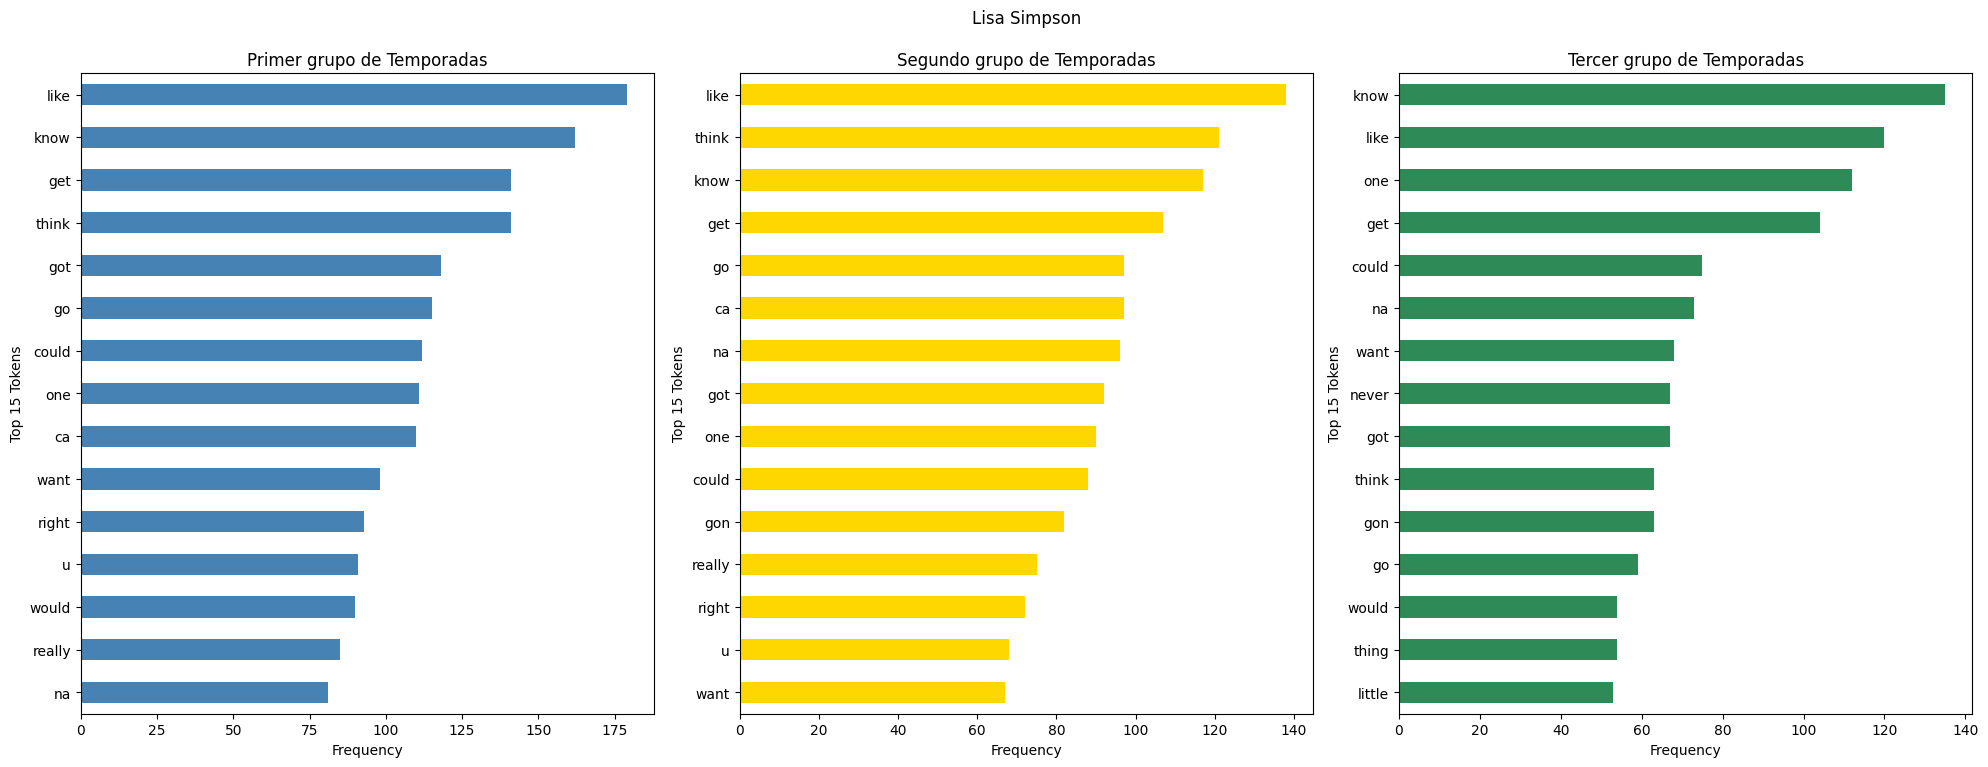

In [32]:
plt.figure(figsize=(20, 8))

plt.title('Lisa Simpson\n\n')
plt.axis('off')

plt.subplot(1, 3, 1)
word_freq_sg1_sorted_ls.plot(kind='barh', color='#4682B4')
plt.title('Primer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 2)
word_freq_sg2_sorted_ls.plot(kind='barh', color='#FFD700')
plt.title('Segundo grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.subplot(1, 3, 3)
word_freq_sg3_sorted_ls.plot(kind='barh', color='#2E8B57')
plt.title('Tercer grupo de Temporadas')
plt.xlabel('Frequency')
plt.ylabel('Top 15 Tokens')

plt.tight_layout()
plt.show()